# 1. Import các thư viện cần thiết và Tải dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!gdown '1MyLRGctRTqdPLVGbrheJZLJnlqzQydNg'
!unzip '/content/data_project.zip'

Downloading...
From: https://drive.google.com/uc?id=1MyLRGctRTqdPLVGbrheJZLJnlqzQydNg
To: /content/data_project.zip
100% 784k/784k [00:00<00:00, 8.42MB/s]
Archive:  /content/data_project.zip
  inflating: X_test.csv              
  inflating: X_train.csv             
  inflating: y_train.csv             


# 2. Tìm hiểu dữ liệu

## Histogram và Phân tích

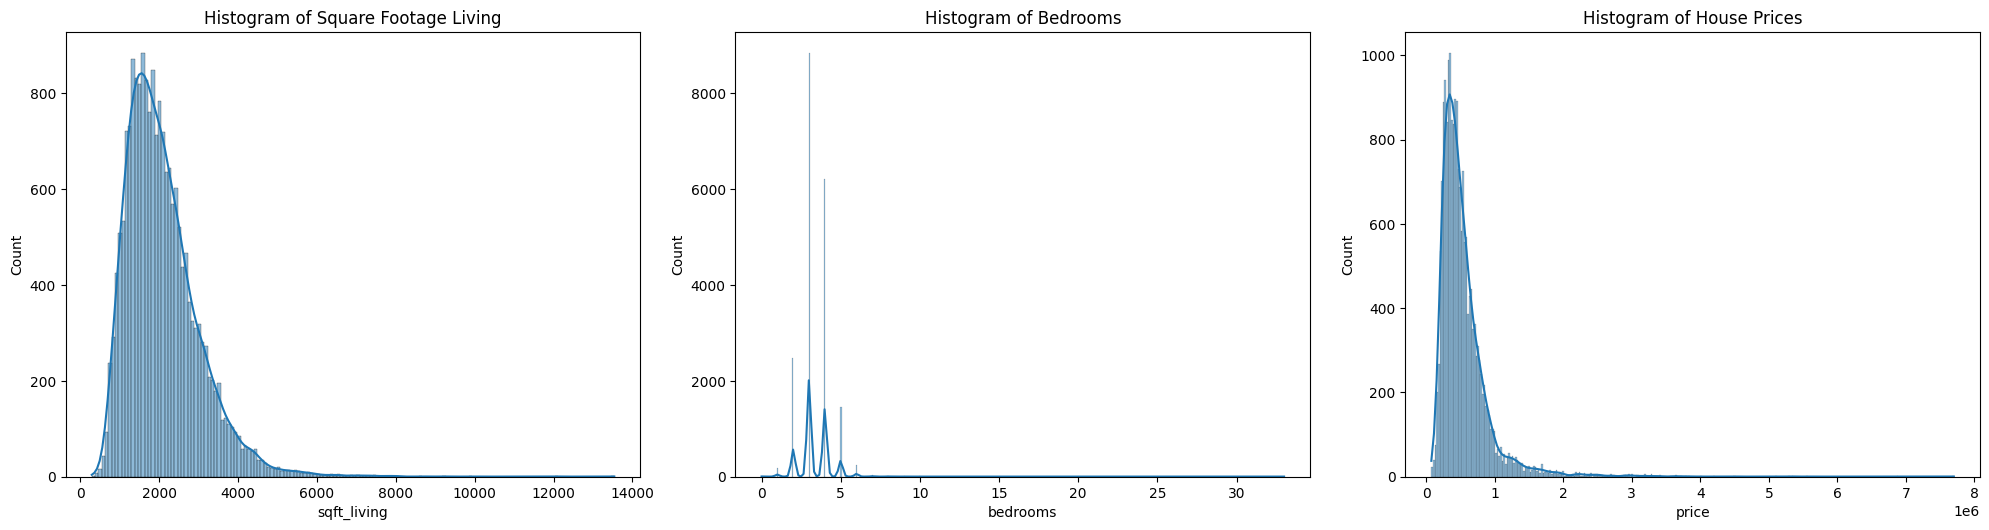

In [ ]:
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('X_test.csv')

plt.figure(figsize=(20, 10))

# 'sqft_living'
plt.subplot(2, 3, 1)
sns.histplot(x_train['sqft_living'], kde=True)
plt.title('Histogram of Square Footage Living')

# 'bedrooms'
plt.subplot(2, 3, 2)
sns.histplot(x_train['bedrooms'], kde=True)
plt.title('Histogram of Bedrooms')

# 'bathrooms'
plt.subplot(2, 3, 3)
sns.histplot(y_train['price'], kde=True)
plt.title('Histogram of House Prices')

# Hiển thị
plt.tight_layout()
plt.show()

**1. Histogram of Square Footage Living**

- Phân phối lệch phải rõ rệt: Đỉnh phân phối nằm ở khoảng 1500-2000 sqft và đuôi kéo dài về phía các giá trị lớn hơn. Ta có thể thấy phần lớn các ngôi nhà có diện tích nhỏ hơn hoặc xấp xỉ 2000 sqft, trong khi có một số ít các ngôi nhà có diện tích rất lớn lên đến hơn 10000 sqft.

- Số lượng nhà đa số có diện tích 1000-3000 sqft.

- Tiềm ẩn dữ liệu nhiễu/ngoại lai: Có một số ít nhà có diện tích khoảng 4000sqft. Tồn tại những ngôi nhà có diện tích lên đến khoảng 14000 sqft. Những giá trị này có thể ảnh hưởng đến các phân tích thống kê do chúng kéo giá trị trung bình lên cao hơn so với thực tế khi ta lấy trung vị.

**2. Histogram of Bedrooms**

- Đa số từ 2-4 phòng ngủ: Biểu đồ cho thấy phần lớn các ngôi nhà có từ 2 đến 4 phòng ngủ. Phổ biến nhất là nhà 3 phòng ngủ

- Số lượng phòng ngủ bất thường: Có một số ít ngôi nhà có số phòng ngủ lớn hơn 10, thậm chí hơn 30.

**3. Histogram của House Prices**

- Phân phối lệch phải rõ rệt: Phần lớn nhà có giá thấp hơn 1 triệu đô la, trong khi có một số ít ngôi nhà có giá cao hơn, lên đến hơn 7 triệu đô la.

- Phố biến: 500 000-600 000 đô là mức giá phố biến nhất. Điều này chỉ ra đó là mức giá phù hợp với khả năng tài chính của nhiều hộ gia đình.

- Dữ liệu ngoại lai/nhiễu: Một số ngôi nhà có giá hơn 7 triệu đôla.


## Heat map của Correlation Matrix và Phân tích

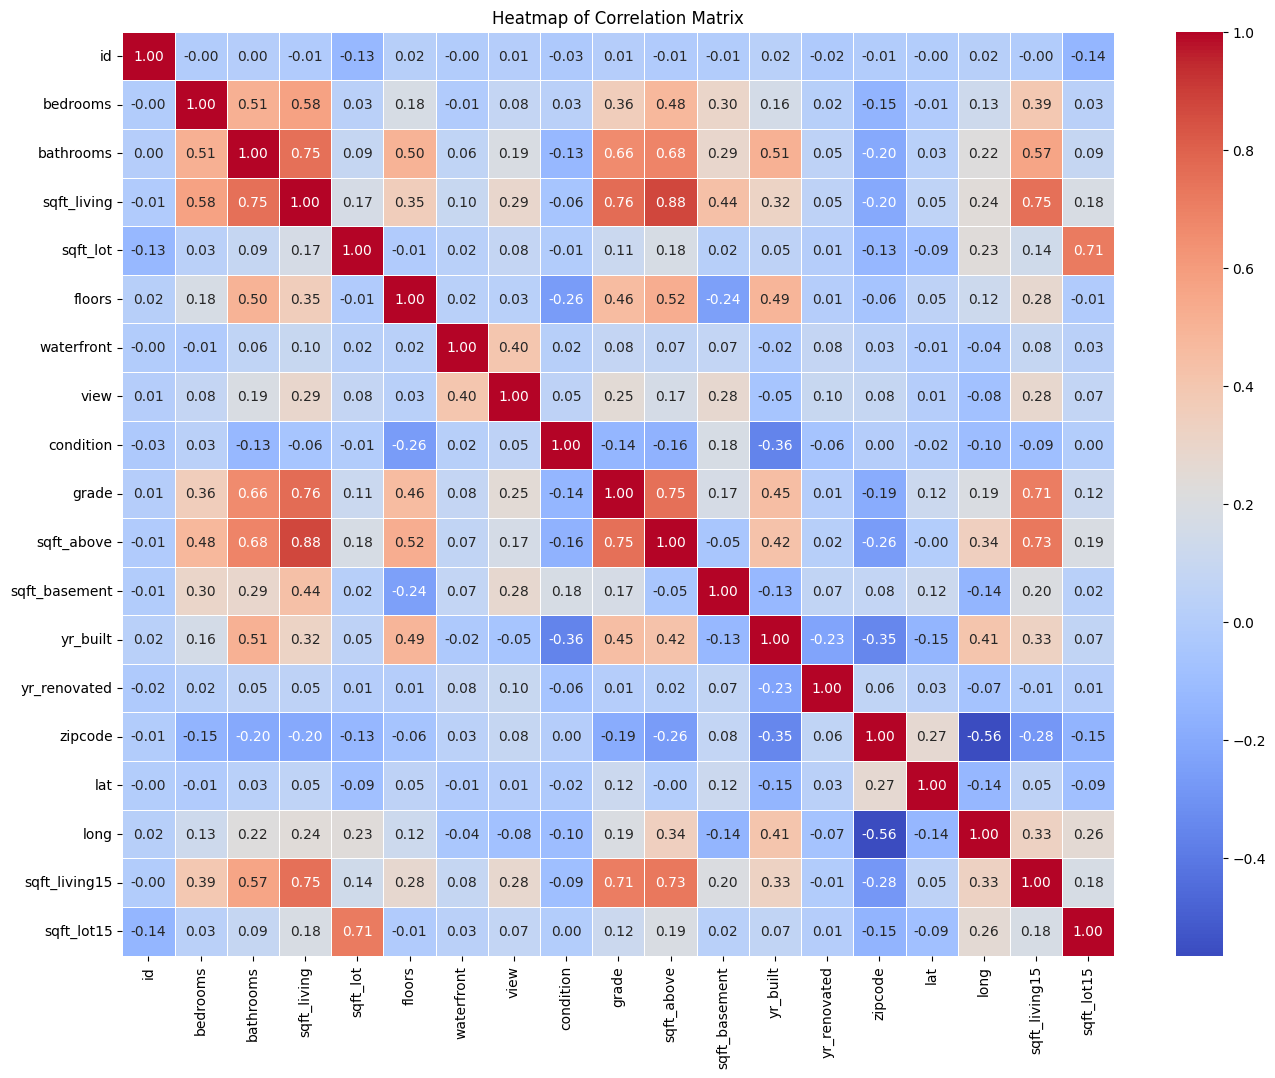

In [ ]:
# Lọc ra các cột có kiểu dữ liệu số
numeric_df = x_train.select_dtypes(include=['float64', 'int64'])

# Ma trận tương quan
corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))

# Heatmap của ma trận tương quan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

**Các mối tương quan mạnh:**

- Diện tích (sqft_living) và diện tích trên mặt đất (sqft_above) có mối tương quan rất mạnh (0.88). Điều này có nghĩa là khi diện tích sống của một ngôi nhà tăng, diện tích trên mặt đất của nó cũng tăng theo.

- Cấp độ của nhà (grade) và diện tích (sqft_living) cũng có mối tương quan mạnh (0.76). Có nghĩa là nhà có cấp càng cao thì sẽ có diện tích càng cao.

- Số phòng tắm (bathrooms) và diện tích sống (sqft_living) có mối tương quan mạnh (0.75), cho thấy rằng những ngôi nhà có nhiều phòng tắm thường có diện tích sống lớn hơn.

**Các mối tương quan yếu:**

- Vị trí (lat, long) và các biến số khác: Kinh độ (long) có tương quan rất yếu với các dữ liệu khác (-0.05 với diện tích sống (sqft_living) và 0.00 với số phòng tắm (bathrooms)). Vĩ độ (lat) cũng có tương quan yếu với hầu hết dữ liệu khác.
Số tầng (floors): Số tầng có mối tương quan yếu với các dữ liệu như diện tích sống (0.35) và diện tích trên mặt đất (0.52).


## Bar chart và Phân tích

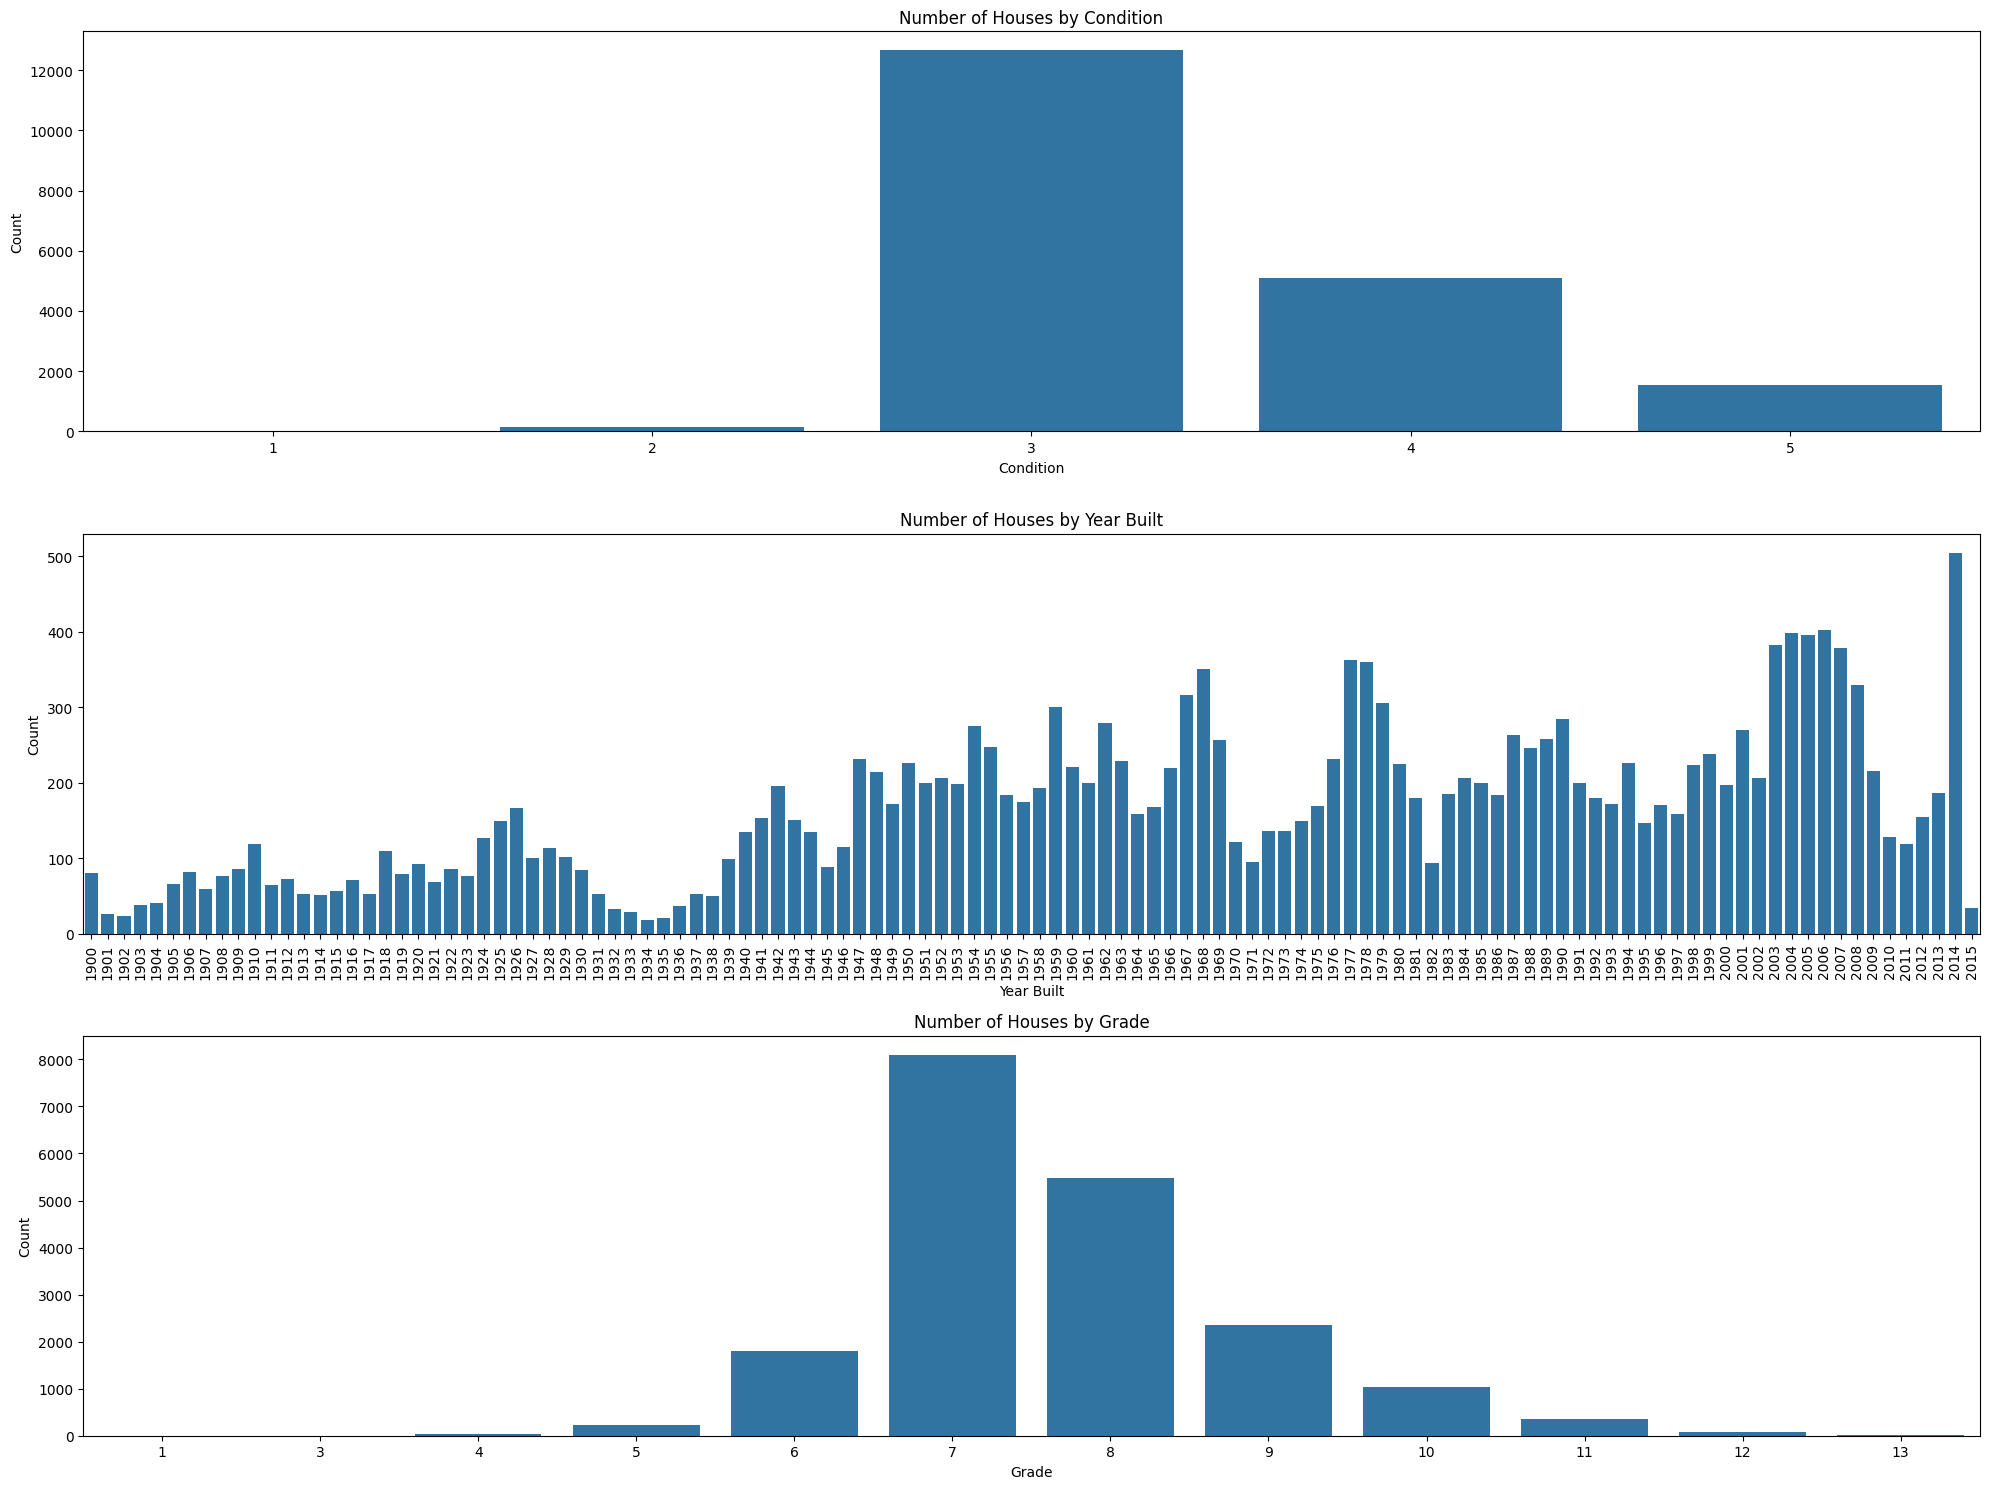

In [ ]:
plt.figure(figsize=(20, 15))

# 'condition'
plt.subplot(3, 1, 1)
sns.countplot(x='condition', data=x_train)
plt.title('Number of Houses by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

# 'yr_built'
plt.subplot(3, 1, 2)
sns.countplot(x='yr_built', data=x_train)
plt.title('Number of Houses by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.xticks(rotation=90)

# 'grade'
plt.subplot(3, 1, 3)
sns.countplot(x='grade', data=x_train)
plt.title('Number of Houses by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**1. Number of Houses by Condition**

- Tình trạng phổ biến nhất: Hơn 12 000 nhà ở mức 3. Có thể coi là tình trạng trung bình (Không tệ nhưng cũng không tốt)

- Phân phối
Tập trung vào tình trạng trung bình đến tốt: Biểu đồ cho thấy phần lớn các ngôi nhà trong tập dữ liệu có tình trạng từ trung bình đến tốt (tình trạng 3 và 4), với tình trạng 3 chiếm đa số. Điều này có thể phản ánh rằng thị trường nhà ở trong khu vực nghiên cứu phần lớn là những ngôi nhà trong tình trạng ổn định, phù hợp với nhu cầu của đa số người mua.
Ít ngôi nhà ở tình trạng xuất sắc hoặc kém: Số lượng nhà ở tình trạng 5 (xuất sắc) và tình trạng 1, 2 (kém) rất ít. Điều này có thể phản ánh rằng thị trường có ít ngôi nhà cao cấp và cũng ít ngôi nhà xuống cấp.

**2. Number of Houses by Grade**

- Nhà cấp 7 phổ biến nhất: Hơn 8000 nhà cấp 7

- Phân bổ tập trung vào hạng trung bình đến khá: Kha khá nhà cấp 6 và 8, lần lượt khoảng 3000 và 4000, cho thấy thị trường nhà ở chủ yếu tập trung vào các ngôi nhà có chất lượng từ trung bình đến khá tốt.

## Box plot và Phân tích

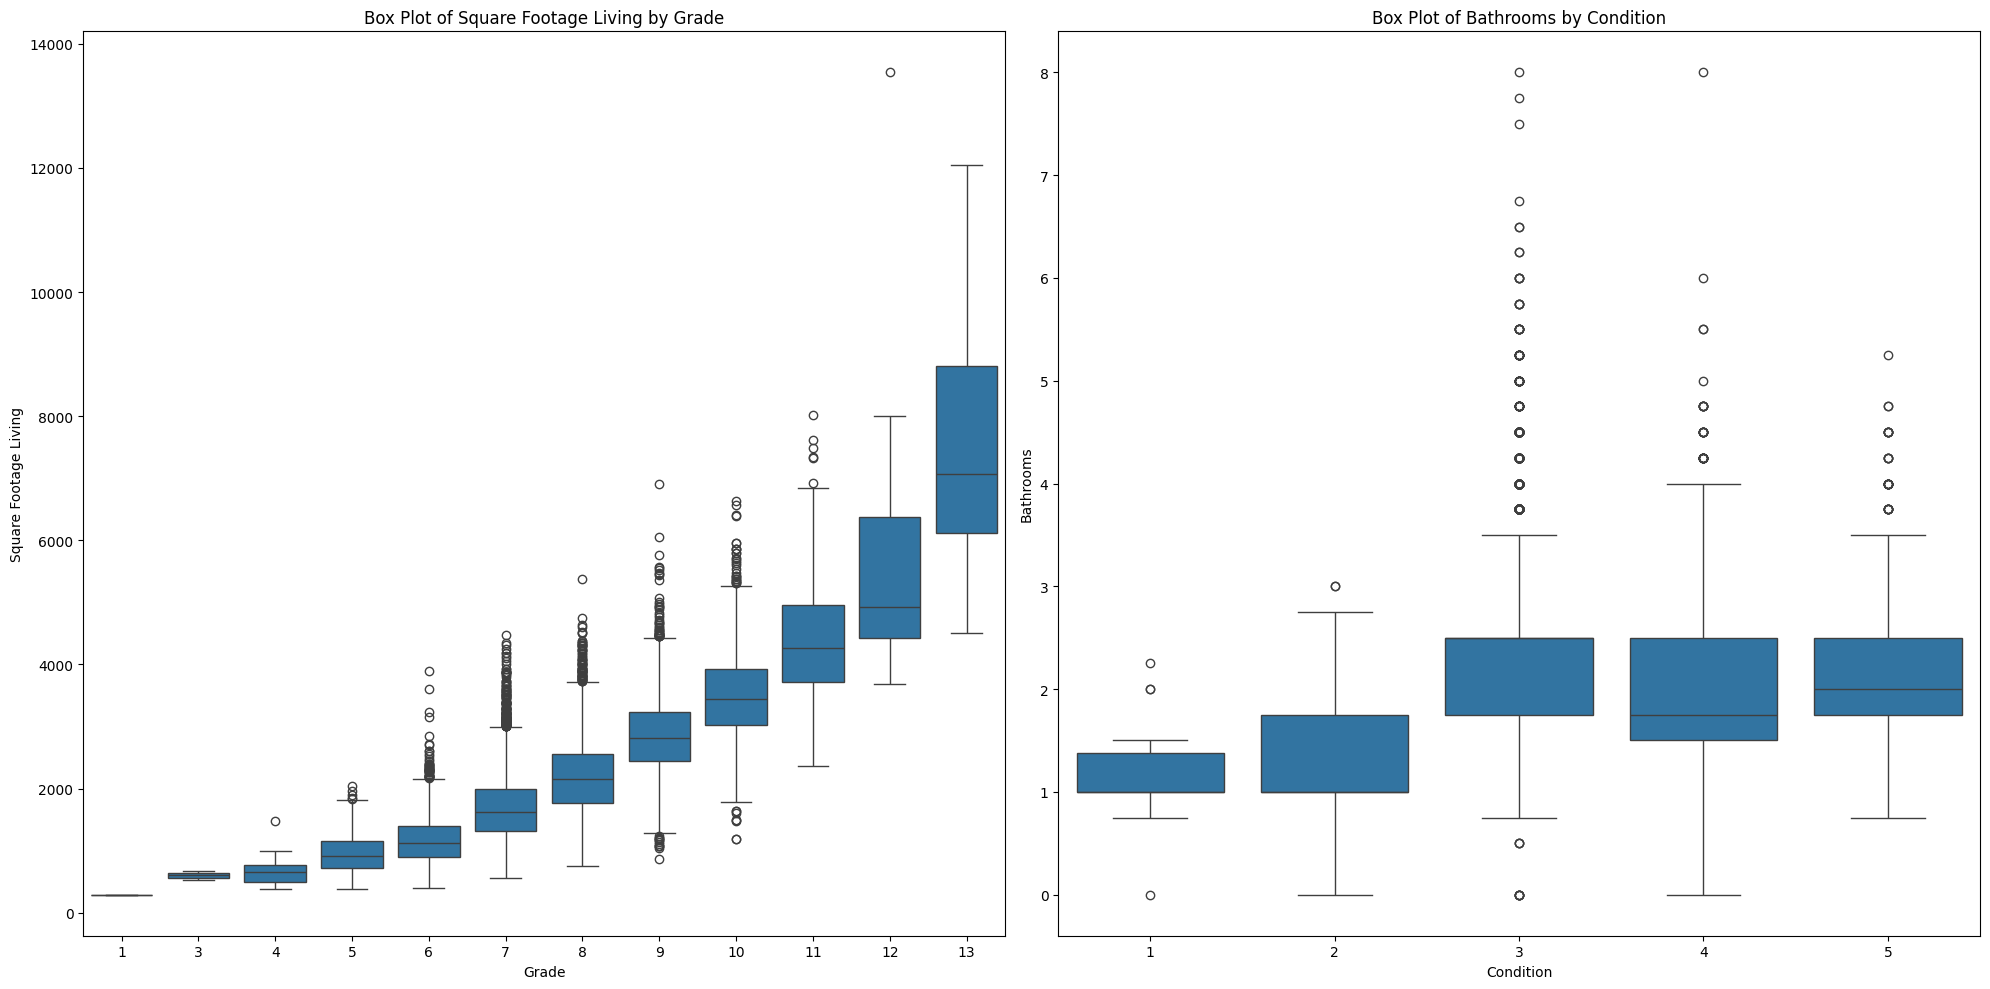

In [ ]:
plt.figure(figsize=(20, 10))

# 'sqft_living' và 'grade'
plt.subplot(1, 2, 1)
sns.boxplot(x='grade', y='sqft_living', data=x_train)
plt.title('Box Plot of Square Footage Living by Grade')
plt.xlabel('Grade')
plt.ylabel('Square Footage Living')

# 'bathrooms' và 'condition'
plt.subplot(1, 2, 2)
sns.boxplot(x='condition', y='bathrooms', data=x_train)
plt.title('Box Plot of Bathrooms by Condition')
plt.xlabel('Condition')
plt.ylabel('Bathrooms')

plt.tight_layout()
plt.show()

**1. Box plot of Square Footage Living by Grade**

- Tăng trưởng diện tích sống theo cấp độ:
Diện tích sống tăng dần theo cấp của nhà, các ngôi nhà cấp 9-13 có diện tích lớn hơn rõ rệt so với nhà cấp 1-8. Các nhà cấp cao hơn thường có diện tích lớn hơn.

- Điểm ngoại lai: Các điểm ngoại lai xuất hiện ở nhà cấp 6-13.

**2. Box plot Bathrooms by Condition**

- Điểm ngoại lai/nhiễu: Nhiều điểm, đặc biệt là ở các nhà có Condition 3-5, cho thấy có những nhà có số phòng tắm lớn hơn nhiều so với phần lớn các ngôi nhà khác trong cùng điều kiện.

## Scatter plot và phân tích

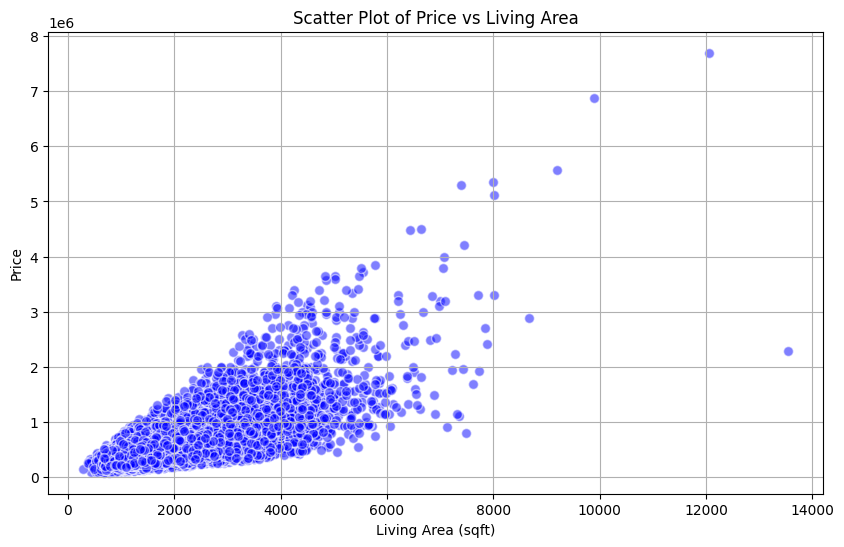

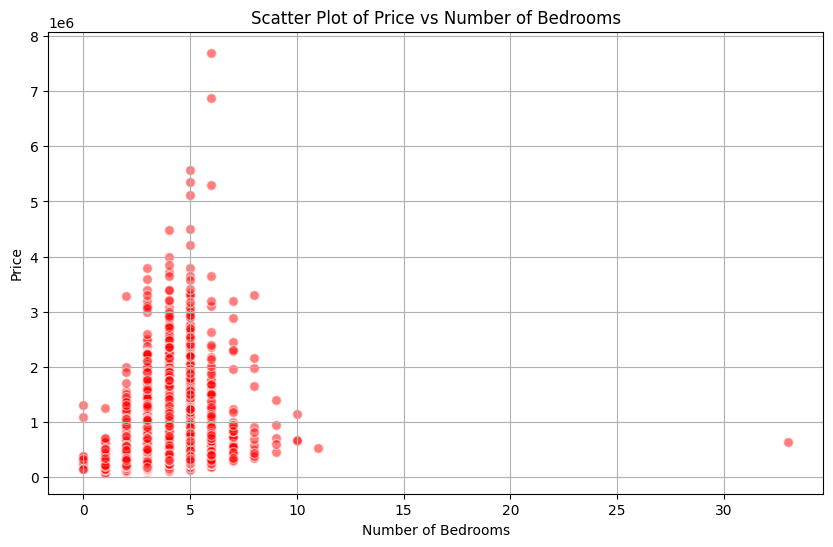

In [ ]:
x_train['price'] = y_train['price']

plt.figure(figsize=(10, 6))
plt.scatter(x_train['sqft_living'], x_train['price'], alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Price vs Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_train['bedrooms'], x_train['price'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**1. Scatter plot of Price vs Living area**

- Sự phân tán tăng theo diện tích căn nhà: Các căn nhà có diện tích dưới 4000 sqft, các điểm dữ liệu tập trung gần nhau hơn, cho thấy giá nhà ít biến động. Tuy nhiên, khi diện tích nhà trên 4000 sqft, sự phân tán của giá cũng tăng, cho thấy giá nhà biến động nhiều hơn đối với các ngôi nhà lớn.

**2. Scatter plot of Price vs Number of Bedrooms**

- Mối quan hệ không rõ ràng giữa số lượng phòng ngủ và giá nhà: Mặc dù có một số xu hướng tăng nhẹ khi số lượng phòng ngủ tăng từ 0 đến 5, nhưng không có mối quan hệ rõ ràng hoặc tuyến tính khi số lượng phòng ngủ tăng lên trên 5.

- Điểm ngoại lệ: Ngôi nhà có số lượng phòng ngủ trên 10 và giá cao hơn 3 triệu USD.

# 3. Data Preprocessing

In [ ]:
x_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7812801850,20141015T000000,3,1.00,1180,6050,1.0,0,0,3,...,820,360,1944,0,98178,47.4945,-122.249,1070,6050,194000.0
1,2423069039,20140806T000000,3,2.50,2500,51836,1.0,0,0,3,...,1510,990,2013,0,98027,47.4694,-121.989,2270,54450,650000.0
2,7831800395,20140515T000000,2,1.00,880,6345,1.0,0,0,3,...,880,0,1919,0,98106,47.5341,-122.358,1440,6345,312500.0
3,1233100601,20141024T000000,2,1.00,840,7414,1.0,0,0,4,...,840,0,1928,0,98033,47.6771,-122.172,1740,9784,360000.0
4,2768200209,20141006T000000,2,2.50,1500,1174,2.0,0,0,3,...,1140,360,2014,0,98107,47.6689,-122.363,1550,1519,529950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19446,5104512060,20141212T000000,4,3.00,2430,7243,2.0,0,0,3,...,2430,0,2003,0,98038,47.3533,-122.016,2430,7084,410000.0
19447,4178500640,20150507T000000,4,2.50,1880,9426,2.0,0,0,4,...,1880,0,1990,0,98042,47.3584,-122.089,1760,7040,306000.0
19448,7883606725,20141111T000000,3,1.00,1100,6000,1.5,0,0,2,...,1100,0,1926,0,98108,47.5279,-122.318,960,5880,174900.0
19449,8562970040,20140516T000000,5,3.25,3690,12353,2.0,0,0,5,...,3690,0,1977,0,98155,47.7672,-122.292,2290,9082,655000.0


**1.**   **Loại bỏ các thuộc tính không hữu dụng**

Nhận thấy thuộc tính **id** không hữu dụng.

In [ ]:
x_train.drop('id', axis = 1, inplace = True)
x_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,20141015T000000,3,1.0,1180,6050,1.0,0,0,3,6,820,360,1944,0,98178,47.4945,-122.249,1070,6050,194000.0
1,20140806T000000,3,2.5,2500,51836,1.0,0,0,3,9,1510,990,2013,0,98027,47.4694,-121.989,2270,54450,650000.0
2,20140515T000000,2,1.0,880,6345,1.0,0,0,3,7,880,0,1919,0,98106,47.5341,-122.358,1440,6345,312500.0
3,20141024T000000,2,1.0,840,7414,1.0,0,0,4,6,840,0,1928,0,98033,47.6771,-122.172,1740,9784,360000.0
4,20141006T000000,2,2.5,1500,1174,2.0,0,0,3,8,1140,360,2014,0,98107,47.6689,-122.363,1550,1519,529950.0


**2.  Bỏ đi một vài thuộc tính có tính tương quan (Correlation) thấp với biến mục tiêu.**




In [ ]:
x_train['zipcode'].value_counts()

zipcode
98103    539
98038    531
98115    523
98052    507
98117    504
        ... 
98102     95
98010     87
98024     69
98148     49
98039     44
Name: count, Length: 70, dtype: int64

Nhận thấy **zipcode** có vẻ không hữu dụng trong quá trình giúp mô hình học tập. Kiểm tra sự tương quan giữa **zipcode** và **price**

In [ ]:
correlation = x_train['zipcode'].corr(x_train['price'])
print("The correlation between zipcode and price is ", correlation)

The correlation between zipcode and price is  -0.052928178203998276


Sự tương quan giữa **zipcode** và **price** quá nhỏ, vì vậy ta xóa **zipcode** ra khỏi dataframe

In [ ]:
x_train.drop('zipcode',axis = 1,inplace = True)

**3. Loại bỏ các bản ghi trùng lặp ra khỏi dataframe**


In [ ]:
x_train = x_train.drop_duplicates()
x_train.shape

(19451, 19)

***Nhận xét***: *Shape của dataframe trước và sau khi loại bỏ các bản ghi trùng lặp giống nhau, vì vậy dataframe lúc đầu không có các giá trị trùng lặp*



**4.   Kiểm tra dataframe có giá trị null hay không, nếu có thay thế bằng giá trị median, mode, mean.**



In [ ]:
x_train.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Như vậy, dữ liệu **không tồn tại** các giá trị rỗng

**5.   Xử lý các thuộc tính phân loại**



In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19451 non-null  object 
 1   bedrooms       19451 non-null  int64  
 2   bathrooms      19451 non-null  float64
 3   sqft_living    19451 non-null  int64  
 4   sqft_lot       19451 non-null  int64  
 5   floors         19451 non-null  float64
 6   waterfront     19451 non-null  int64  
 7   view           19451 non-null  int64  
 8   condition      19451 non-null  int64  
 9   grade          19451 non-null  int64  
 10  sqft_above     19451 non-null  int64  
 11  sqft_basement  19451 non-null  int64  
 12  yr_built       19451 non-null  int64  
 13  yr_renovated   19451 non-null  int64  
 14  lat            19451 non-null  float64
 15  long           19451 non-null  float64
 16  sqft_living15  19451 non-null  int64  
 17  sqft_lot15     19451 non-null  int64  
 18  price 

Xử lí **date** đang ở dạng **object**

In [ ]:
x_train['date'] = pd.to_datetime(x_train['date'])
x_train['year'] = x_train['date'].apply(lambda date: date.year)
x_train['month'] = x_train['date'].apply(lambda date: date.month)

Xóa cột **date** ra khỏi dataframe

In [ ]:
x_train.drop('date', axis = 1,inplace = True)

Thêm cột **age** là độ tuổi của căn nhà khi được bán

In [ ]:
x_train['age'] = x_train['year' ] - x_train['yr_built']
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year,month,age
0,3,1.0,1180,6050,1.0,0,0,3,6,820,...,1944,0,47.4945,-122.249,1070,6050,194000.0,2014,10,70
1,3,2.5,2500,51836,1.0,0,0,3,9,1510,...,2013,0,47.4694,-121.989,2270,54450,650000.0,2014,8,1
2,2,1.0,880,6345,1.0,0,0,3,7,880,...,1919,0,47.5341,-122.358,1440,6345,312500.0,2014,5,95
3,2,1.0,840,7414,1.0,0,0,4,6,840,...,1928,0,47.6771,-122.172,1740,9784,360000.0,2014,10,86
4,2,2.5,1500,1174,2.0,0,0,3,8,1140,...,2014,0,47.6689,-122.363,1550,1519,529950.0,2014,10,0


In [ ]:
from scipy.stats import zscore
z_scores = np.abs(zscore(x_train))

# Đặt ngưỡng cho Z-score (thường là 3)
threshold = 3

# Xác định các hàng có outliers
outliers = (z_scores > threshold).any(axis=1)

# Lọc dữ liệu để loại bỏ outliers
filtered_df = x_train[~outliers]

print(filtered_df)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      6050     1.0           0     0   
1             3       2.50         2500     51836     1.0           0     0   
2             2       1.00          880      6345     1.0           0     0   
3             2       1.00          840      7414     1.0           0     0   
4             2       2.50         1500      1174     2.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
19446         4       3.00         2430      7243     2.0           0     0   
19447         4       2.50         1880      9426     2.0           0     0   
19448         3       1.00         1100      6000     1.5           0     0   
19449         5       3.25         3690     12353     2.0           0     0   
19450         5       2.75         2390      6282     1.0           0     0   

       condition  grade  sqft_above  ...  yr_built 

In [ ]:
x_train = filtered_df

**Sau khi đã xử lí dữ liệu xong, tách dataframe thành tập x_train, Y train**

In [ ]:
y_train = x_train['price']
x_train = x_train.drop('price', axis = 1)

**Thực hiện xóa các cột không cần thiết và thêm một số cột ở x_test**


In [ ]:
x_test.drop(['id','zipcode'], axis = 1, inplace = True)
x_test['date'] = pd.to_datetime(x_test['date'])
x_test['year'] = x_test['date'].apply(lambda date: date.year)
x_test['month'] = x_test['date'].apply(lambda date: date.month)
x_test.drop('date', axis = 1,inplace = True)
x_test['age'] = x_test['year' ] - x_test['yr_built']
x_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
0,2,2.50,1570,1268,3.0,0,0,3,7,1570,0,2007,0,47.5340,-122.365,1570,1300,2014,12,7
1,3,1.50,1130,7200,1.0,0,0,3,7,1130,0,1954,0,47.5041,-122.253,1130,7200,2015,4,61
2,5,3.75,4220,9240,2.0,0,2,5,11,3420,800,1991,0,47.5895,-122.229,3380,9240,2014,9,23
3,3,2.50,1710,1664,2.0,0,0,5,8,1300,410,2003,0,47.6456,-122.383,1470,5400,2014,6,11
4,4,2.25,3310,127631,2.0,0,0,5,9,3310,0,1924,1956,47.7320,-122.134,3830,43959,2014,6,90


## Visualize sau khi tiền xử lí dữ liệu


In [ ]:
df = x_train
df_price = pd.DataFrame()
df_price['price'] = y_train

Histogram

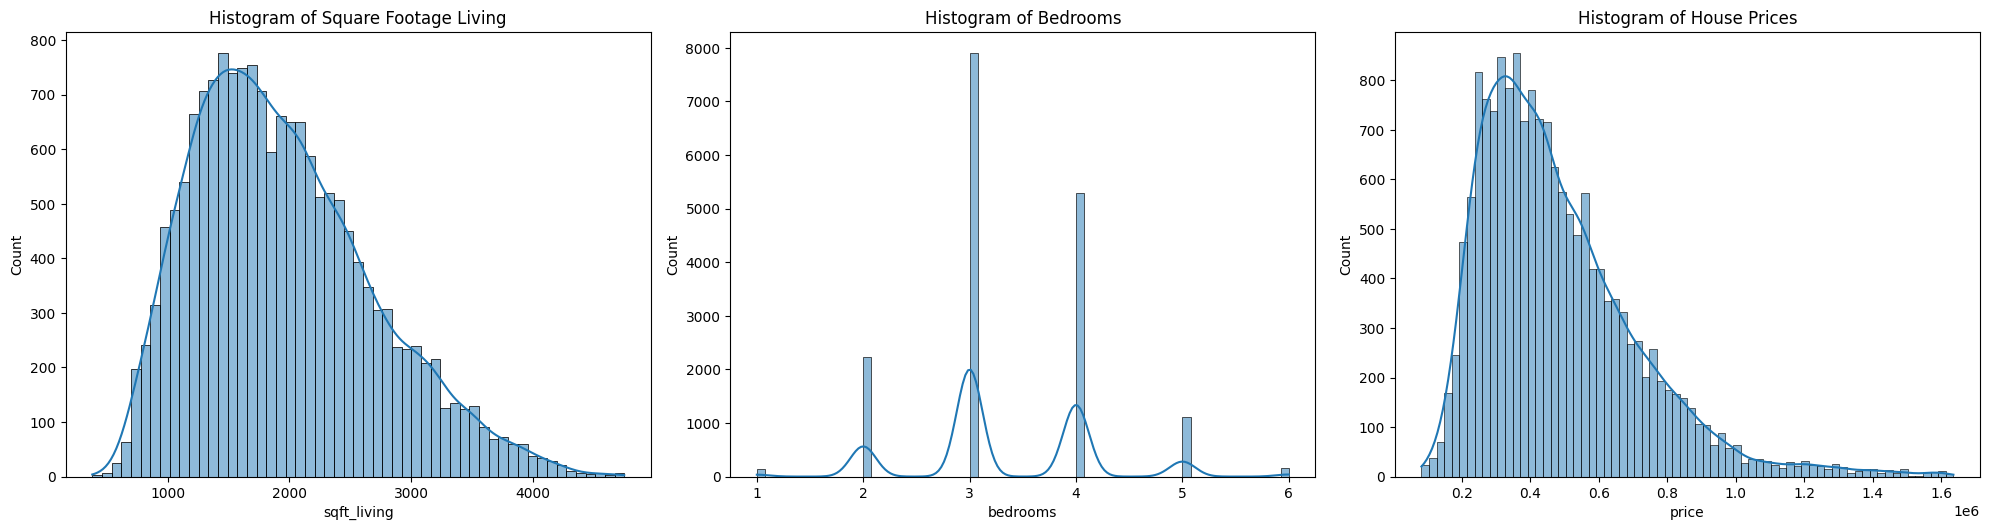

In [ ]:
# Kích thước biểu đồ
plt.figure(figsize=(20, 10))

# 'sqft_living'
plt.subplot(2, 3, 1)
sns.histplot(df['sqft_living'], kde=True)
plt.title('Histogram of Square Footage Living')

# 'bedrooms'
plt.subplot(2, 3, 2)
sns.histplot(df['bedrooms'], kde=True)
plt.title('Histogram of Bedrooms')

# 'bathrooms'
plt.subplot(2, 3, 3)
sns.histplot(df_price['price'], kde=True)
plt.title('Histogram of House Prices')

plt.tight_layout()
plt.show()

Thu hẹp đáng kể miền dữ liệu

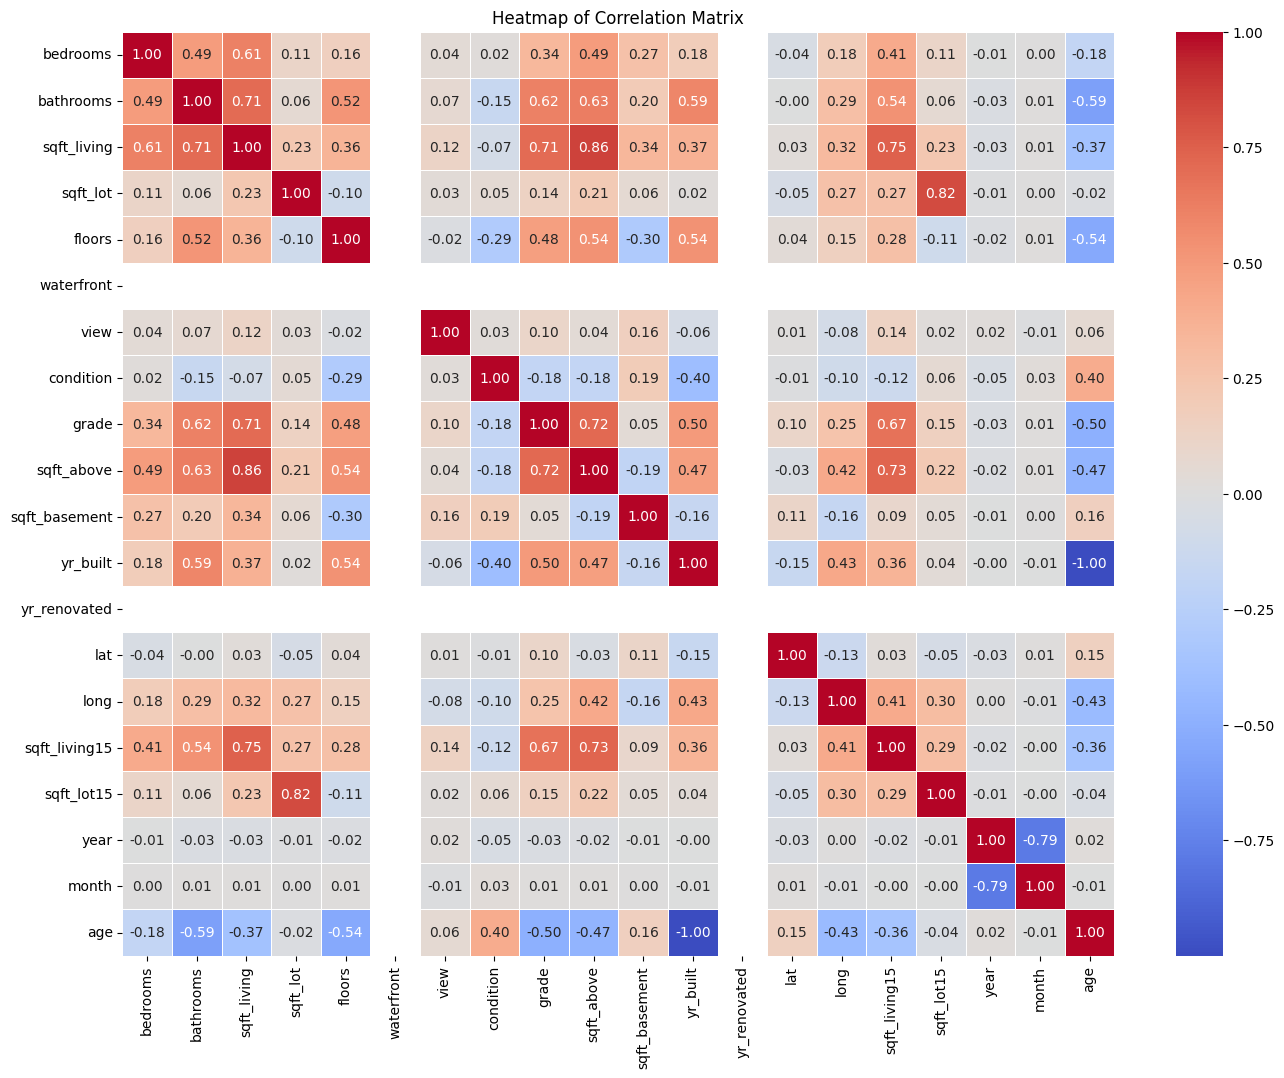

In [ ]:
# Lọc ra các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Ma trận tương quan
corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))

# Heatmap của ma trận tương quan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

sqft_living và grade có mối tương quan cao (khoảng 0.75), cho diện tích sinh hoạt lớn thường đi kèm với chất lượng nhà cao hơn.

Bar chart

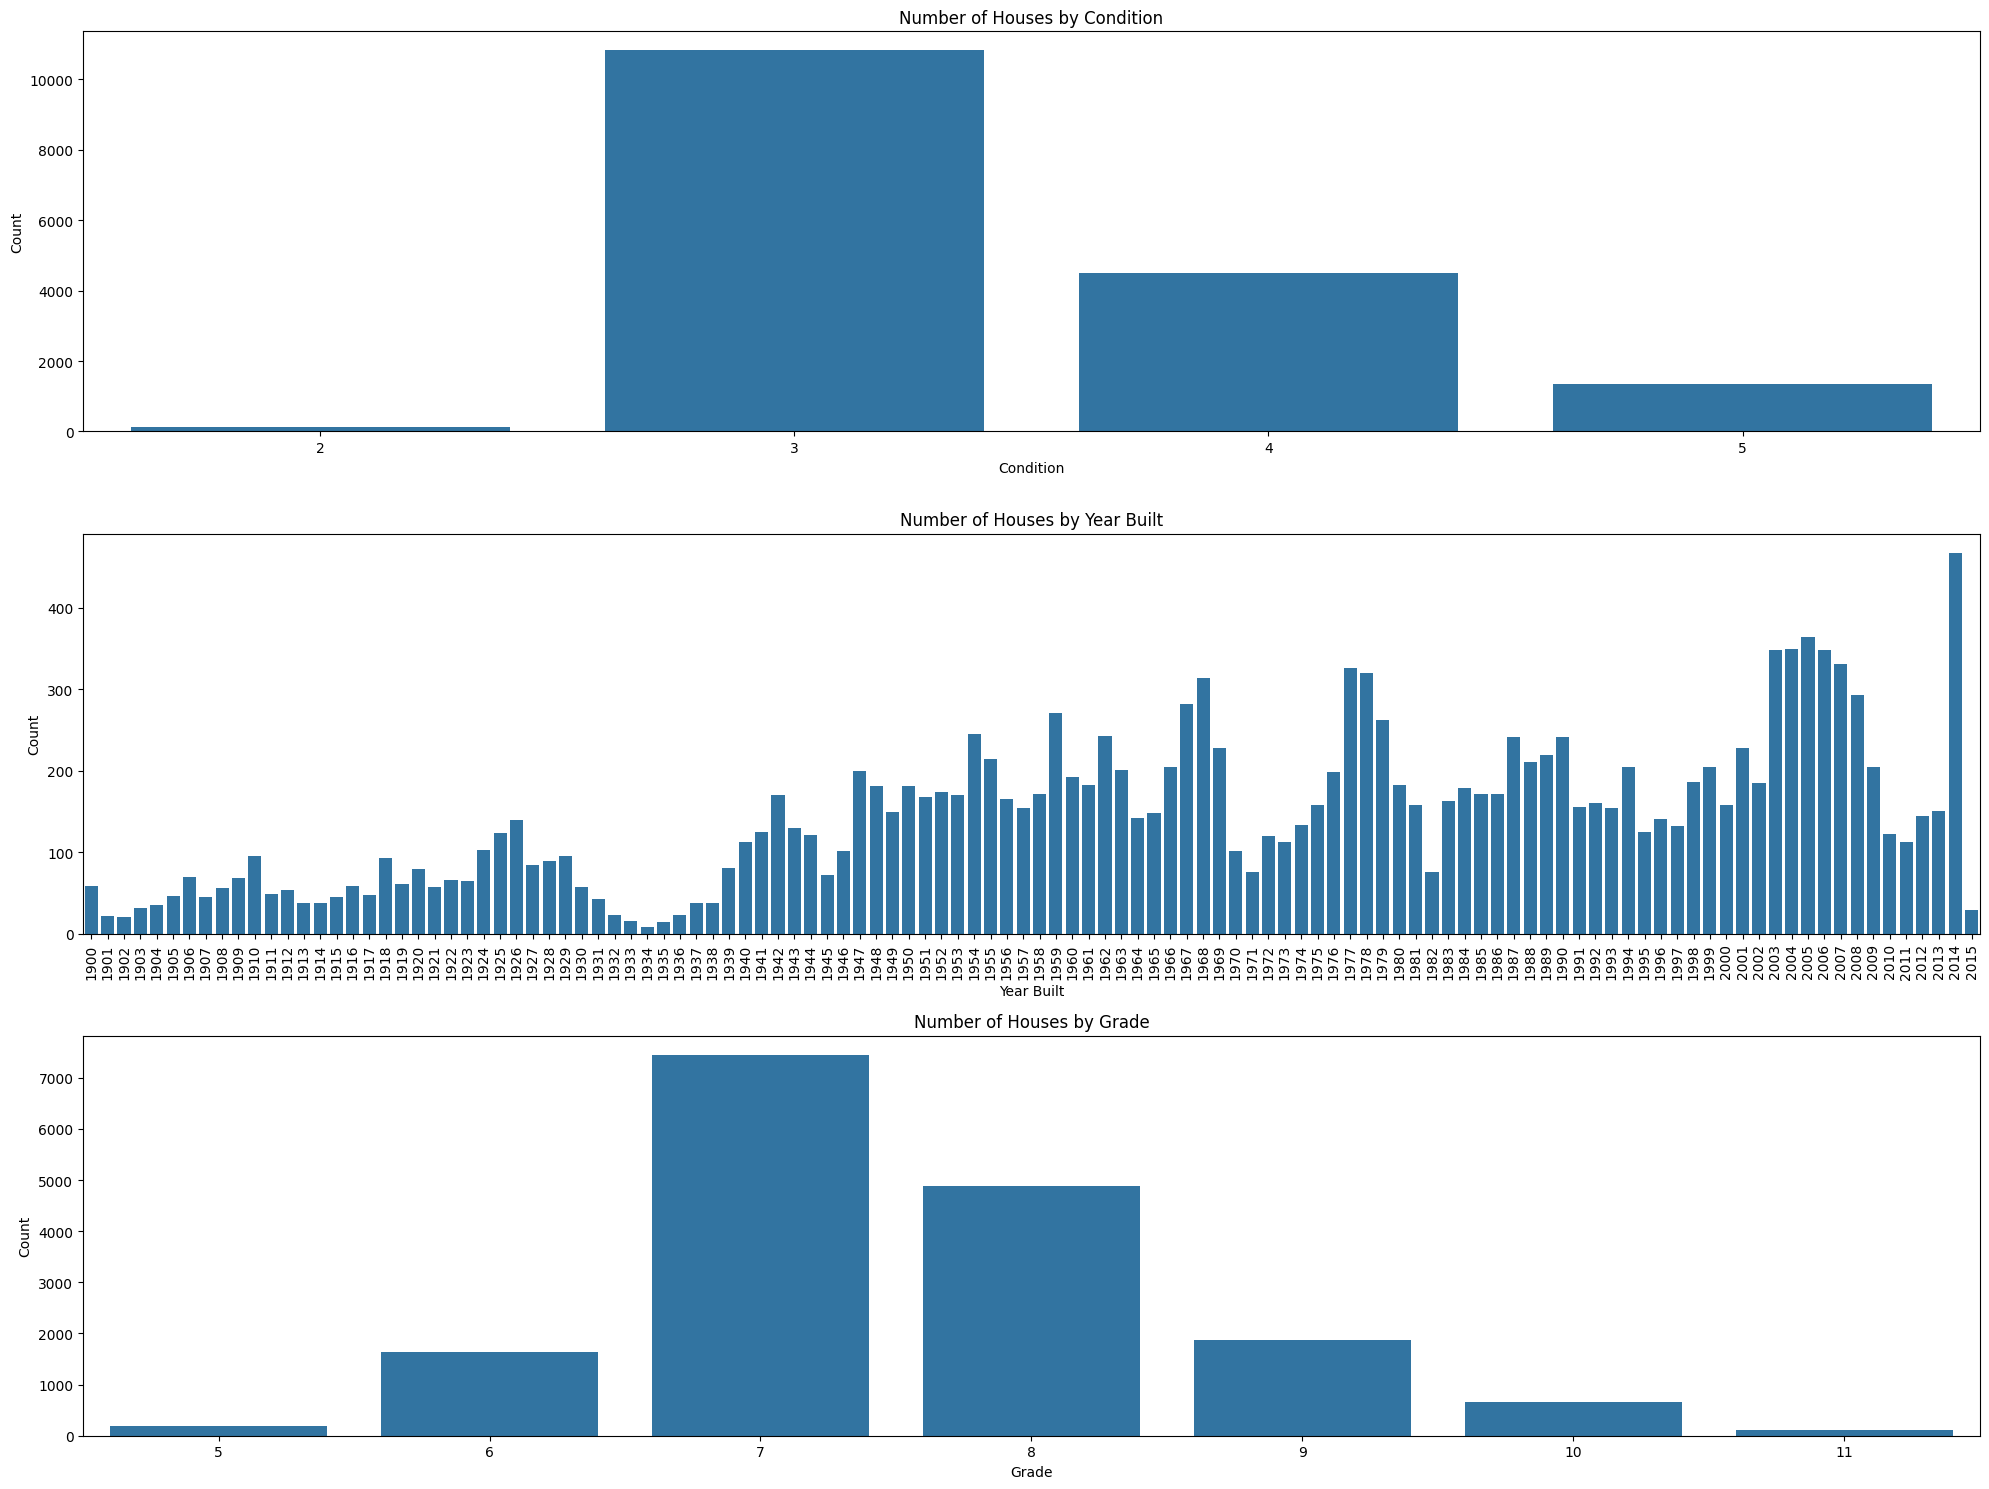

In [ ]:
plt.figure(figsize=(20, 15))

# 'condition'
plt.subplot(3, 1, 1)
sns.countplot(x='condition', data=df)
plt.title('Number of Houses by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

# 'yr_built'
plt.subplot(3, 1, 2)
sns.countplot(x='yr_built', data=df)
plt.title('Number of Houses by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc

# 'grade'
plt.subplot(3, 1, 3)
sns.countplot(x='grade', data=df)
plt.title('Number of Houses by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

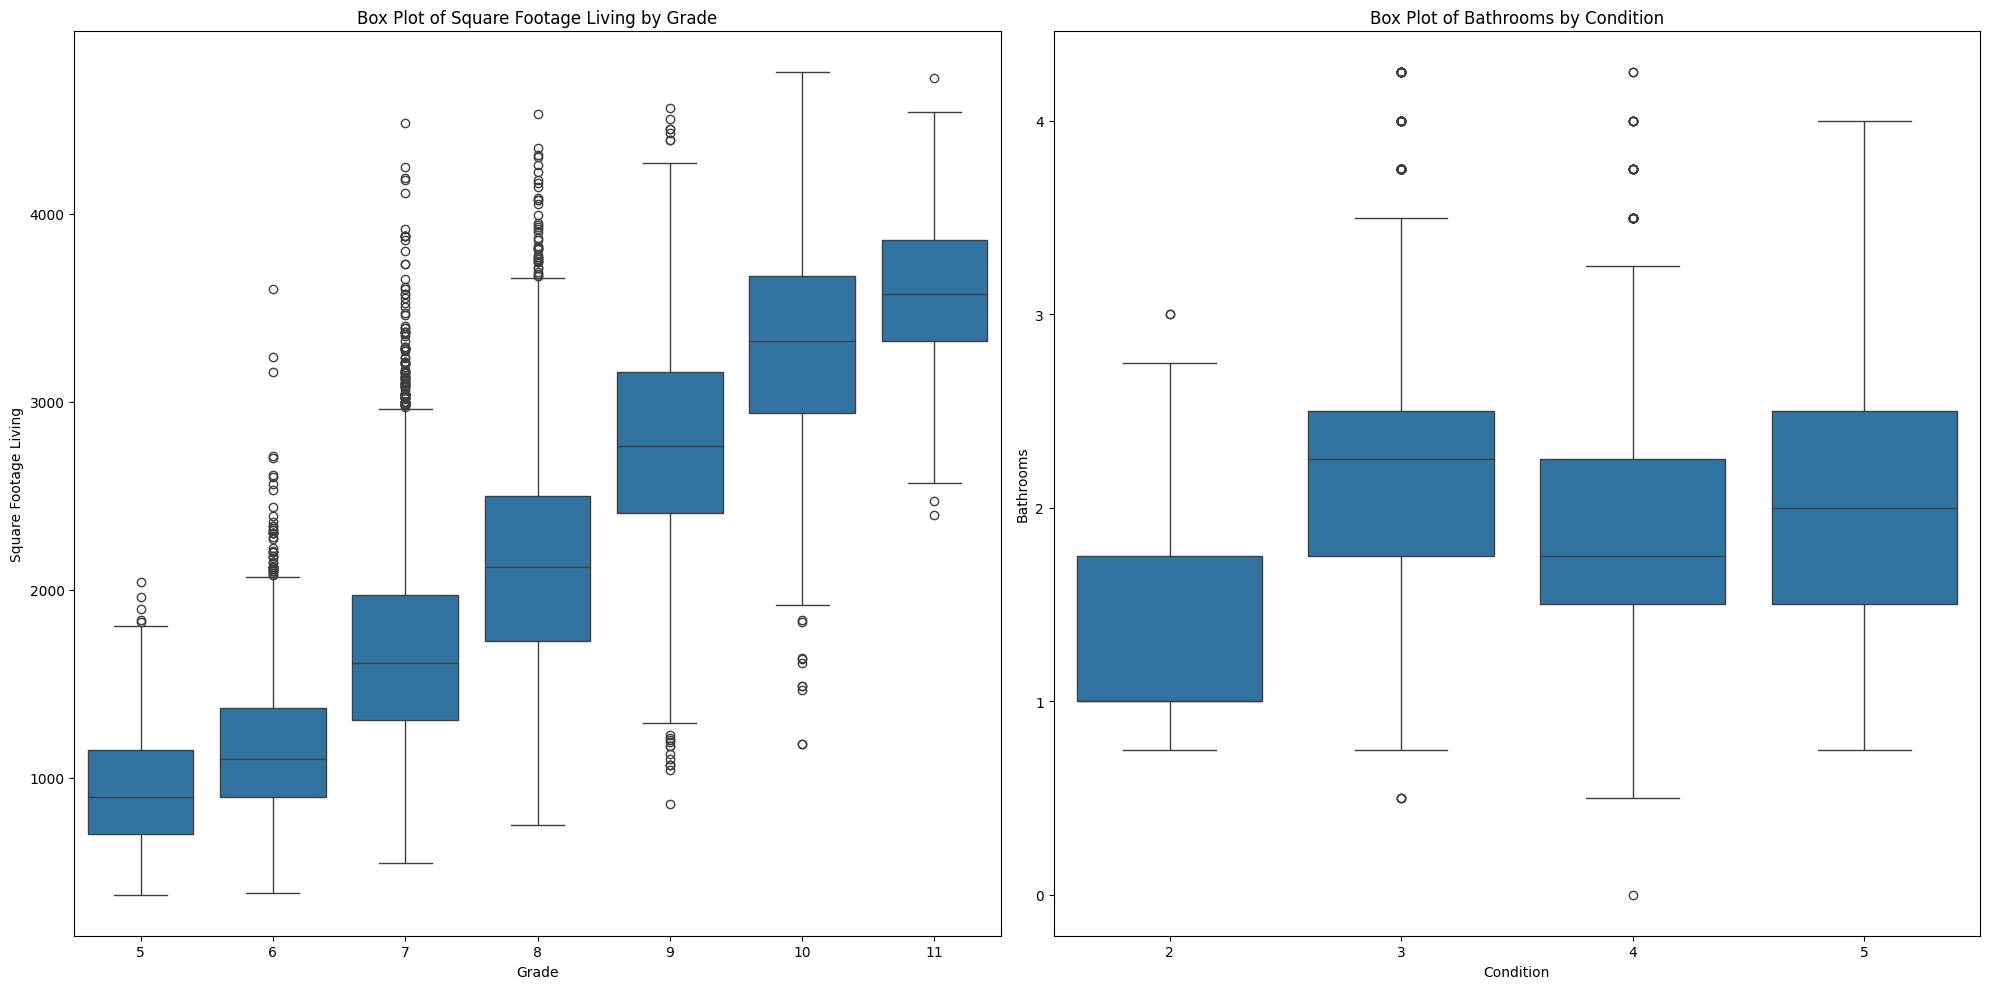

In [ ]:
plt.figure(figsize=(20, 10))

# 'sqft_living' và 'grade'
plt.subplot(1, 2, 1)
sns.boxplot(x='grade', y='sqft_living', data=df)
plt.title('Box Plot of Square Footage Living by Grade')
plt.xlabel('Grade')
plt.ylabel('Square Footage Living')

# 'bathrooms' và 'condition'
plt.subplot(1, 2, 2)
sns.boxplot(x='condition', y='bathrooms', data=df)
plt.title('Box Plot of Bathrooms by Condition')
plt.xlabel('Condition')
plt.ylabel('Bathrooms')

plt.tight_layout()
plt.show()

Diện tích sinh hoạt (Square Footage Living) tăng dần theo cấp của nhà (Grade).

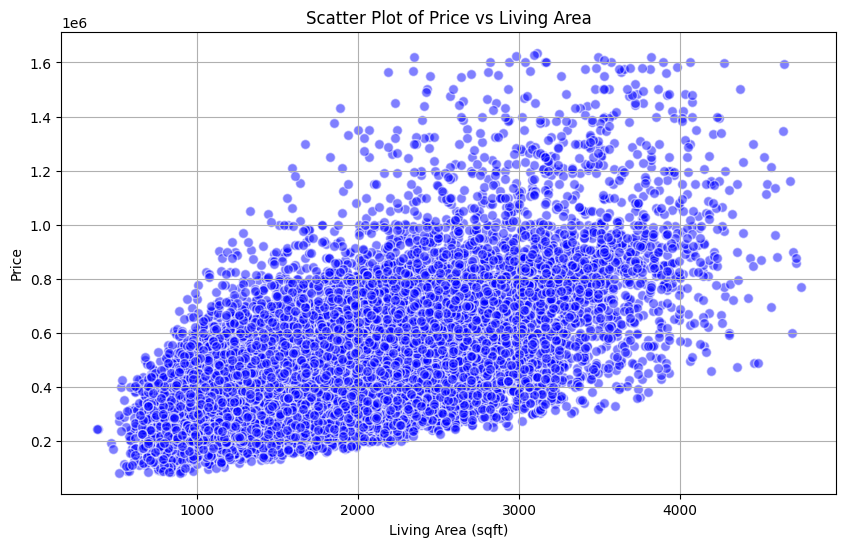

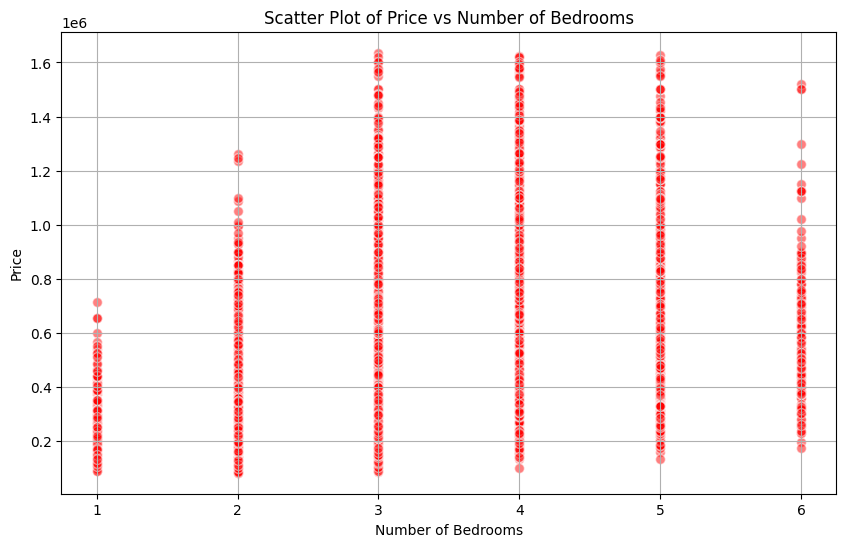

In [ ]:
df['price'] = df_price['price']

plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Price vs Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()
df.drop(['price'], axis = 1, inplace = True)

Thành công loại bỏ một số điểm dữ liệu nhiễu, tăng độ chính xác của model đã train.

## Data Scaling and Distributing

Chia dữ liệu thành 2 tập train và validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

Đưa dữ liệu qua Pipeline để Normalize và Standardize

In [ ]:
preprocessor = Pipeline([
    ('normalizing', MinMaxScaler()),  # Normalizing numerical features
    ('standardizing', StandardScaler())  # Standardizing numerical features
])

In [ ]:
x_train = preprocessor.fit_transform(x_train)
X_val = preprocessor.transform(x_val)

# 4. Xây dựng mô hình

## 4.1. K Nearest Neighbors


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(X_val)

print("KNN MAE:", mean_absolute_error(y_val, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_val, y_pred_knn))
print("KNN R^2 Score:", r2_score(y_val, y_pred_knn))

KNN MAE: 79665.74003569304
KNN MSE: 15721166148.592577
KNN R^2 Score: 0.7370715136623649


## 4.2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(X_val)

print("Linear Regression MAE:", mean_absolute_error(y_val, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_val, y_pred_lr))
print("Linear Regression R^2 Score:", r2_score(y_val, y_pred_lr))

Linear Regression MAE: 96283.87072776572
Linear Regression MSE: 19382161126.20453
Linear Regression R^2 Score: 0.6758432397000438


## 4.3. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(X_val)

print("Decision Tree MAE:", mean_absolute_error(y_val, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_val, y_pred_dt))
print("Decision Tree R^2 Score:", r2_score(y_val, y_pred_dt))

Decision Tree MAE: 78042.04521118382
Decision Tree MSE: 14399939564.254908
Decision Tree R^2 Score: 0.759168354484828


## 4.4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(X_val)

print("Random Forest MAE:", mean_absolute_error(y_val, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_val, y_pred_rf))
print("Random Forest R^2 Score:", r2_score(y_val, y_pred_rf))

Random Forest MAE: 54470.7353812215
Random Forest MSE: 7562201902.221982
Random Forest R^2 Score: 0.8735260297653674


## 4.5. XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(X_val)

print("XGBoost MAE:", mean_absolute_error(y_val, y_pred_xgbr))
print("XGBoost MSE:", mean_squared_error(y_val, y_pred_xgbr))
print("XGBoost R^2 Score:", r2_score(y_val, y_pred_xgbr))

XGBoost MAE: 55061.19855182927
XGBoost MSE: 7529787045.97645
XGBoost R^2 Score: 0.87406815170511


Ta nhận thấy mô hình Random Forest cho ra kết quả tốt nhất. Vì vậy mô hình được tiếp tục sử dụng để tối ưu hóa các tham số

# **5.TỐI ƯU HÓA CÁC THAM SỐ**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Chuẩn bị dữ liệu

# Giả sử chúng ta có dữ liệu giá nhà trong DataFrame
# Dưới đây là một ví dụ minh họa, bạn có thể thay thế bằng dữ liệu thực tế của mình
# df = pd.read_csv('house_prices.csv')

# Giả sử df có các cột: 'features' chứa các đặc trưng và 'price' là giá nhà
# X = df.drop('price', axis=1)
# y = df['price']

# Ví dụ dữ liệu giả sử dụng bộ dữ liệu Boston Housing (đã không còn trong sklearn, thay bằng dữ liệu giả)
# from sklearn.datasets import load_boston
# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = pd.Series(data.target)


# Chọn mô hình
model = RandomForestRegressor()

# Xác định tập siêu tham số
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Định nghĩa GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Huấn luyện mô hình
grid.fit(x_train, y_train)

# Đánh giá mô hình
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Dự đoán trên tập test
y_pred = grid.predict(x_test)

# Lưu giá trị dự đoán
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Price'])
y_pred_df.to_csv('y_pred.csv', index=False)

print("Predicted values saved to y_pred.csv")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8684255775645786
Predicted values saved to y_pred.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
